In [1]:
from __future__ import print_function
import sys, os, json, math
import numpy, scipy
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import PIL, cv2

import keras
from keras import *
import tensorflow as tf
import keras.backend as K
from keras.preprocessing  import utils
from keras.preprocessing.image import *
from keras_preprocessing import *
from keras_tqdm import *
from keras_applications import *
from keras_contrib import *
from keras.models import *
from keras.datasets import *
from keras.layers import *
from keras.preprocessing import *
from keras.optimizers import  *
from keras.losses import  *
from keras.metrics import  *
from keras.callbacks import  *
from keras.activations import  *
from keras.regularizers import  *
from keras.layers.advanced_activations import PReLU

print(keras.__version__)
print(tf.__version__)

Using TensorFlow backend.


2.3.1
2.0.0


In [2]:
img_rows, img_cols, img_ch = 227, 227, 3
batch_size =32
nepochs=50
dir_tr ='../Model/l/'
dir_val='../Model/l/'

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(directory=dir_tr,target_size=(img_rows,img_cols))
validation_generator = test_datagen.flow_from_directory(directory=dir_tr, target_size=(img_rows,img_cols))

Found 612 images belonging to 100 classes.
Found 612 images belonging to 100 classes.


In [5]:
images, labels =next(train_generator)

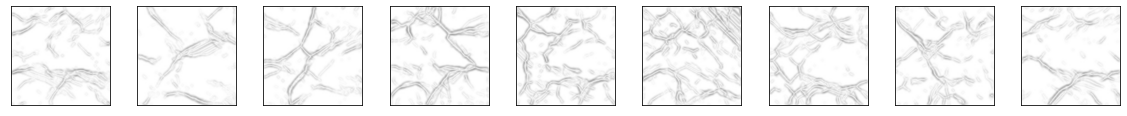

In [6]:
n = 9  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [7]:
############Model##################
input_img = Input(shape=(img_rows, img_cols, img_ch))

In [8]:
classifier = Sequential()

# 1st Convolutional Layer
classifier.add(Conv2D(filters=96, input_shape=(img_rows, img_cols, img_ch), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
classifier.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
classifier.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
classifier.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
classifier.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
classifier.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
classifier.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
classifier.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
classifier.add(Flatten())
# 1st Fully Connected Layer
classifier.add(Dense(units = 4096, activation = "relu"))

# 2nd Fully Connected Layer
classifier.add(Dense(4096, activation = "relu"))

# Output Layer
classifier.add(Dense(100, activation = "softmax")) #As we have two classes
classifier.summary()

opt = Adam(lr=0.0008)
classifier.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)      

In [ ]:
history = classifier.fit_generator(
        train_generator,
        steps_per_epoch=((train_generator.samples))//batch_size,
        epochs=nepochs,verbose=1,
        validation_data=validation_generator,
        validation_steps= ((validation_generator.samples))// batch_size)

Epoch 1/50
19/19 [==============================] - 94s 5s/step - loss: 5.0605 - accuracy: 0.0086 - val_loss: 4.5989 - val_accuracy: 0.0197
Epoch 2/50
19/19 [==============================] - 96s 5s/step - loss: 4.6769 - accuracy: 0.0190 - val_loss: 4.6113 - val_accuracy: 0.0172
Epoch 3/50
19/19 [==============================] - 99s 5s/step - loss: 4.6080 - accuracy: 0.0190 - val_loss: 4.6057 - val_accuracy: 0.0190
Epoch 4/50
19/19 [==============================] - 99s 5s/step - loss: 4.6058 - accuracy: 0.0190 - val_loss: 4.6029 - val_accuracy: 0.0241
Epoch 5/50
19/19 [==============================] - 99s 5s/step - loss: 4.6054 - accuracy: 0.0190 - val_loss: 4.6068 - val_accuracy: 0.0207
Epoch 6/50
19/19 [==============================] - 125s 7s/step - loss: 4.6180 - accuracy: 0.0155 - val_loss: 4.6021 - val_accuracy: 0.0172
Epoch 7/50
 9/19 [=============>................] - ETA: 53s - loss: 4.6047 - accuracy: 0.0312